## Método de Runge-Kutta de 4to orden

En análisis numérico, los métodos de Runge-Kutta son un conjunto de métodos
genéricos iterativos, explícitos e implícitos, de resolución numérica de ecuaciones 
diferenciales. Este conjunto de métodos fue inicialmente desarrollado alrededor del
año 1900 por los matemáticos C. Runge y M. W. Kutta.

Un sistema de ecuaciones diferenciales ordinarias de primer orden escrito en forma 
explícita es un sistema de ecuaciones de la forma:

\begin{equation}
    \frac{d\vec{x}}{dt}=\vec{f}(t,\vec{x}) \quad \vec{x}(t_0)=\vec{x}_0,
\end{equation}

donde,

\begin{equation}
    \vec{x} = \left( 
    \begin{array}{cc}
        x_1\\
        x_2\\
        \vdots\\
        x_n
    \end{array}
    \right),
    \quad
    \quad
     \vec{f}(t,\vec{x}) = \left( 
    \begin{array}{cc}
        f_1(t,\vec{x})\\
        f_2(t,\vec{x})\\
        \vdots\\
        f_n(t,\vec{x})
    \end{array}
    \right).
\end{equation}

Nos interesa reescribir este sistema de manera tal que sea un sistema autónomo, es decir, 
un sistema donde la función $\vec{f}(\vec{x})$ no dependa de la variable $t$. Hacemos el 
siguiente cambio de variable

\begin{equation}
    x_0 = t \quad \Rightarrow \quad f_0 = \frac{dx_0}{dt}=1,
\end{equation}

esto nos permite reescribir el sistema de ecuaciones diferenciales de la siguiente forma,

\begin{equation}
    \frac{d\vec{x}}{dt}=\vec{f}(\vec{x}) \quad \vec{x}(t_0)=\vec{x}_0
\end{equation}

donde,

\begin{equation}
    \vec{x} = \left( 
    \begin{array}{cc}
        x_0\\
        x_1\\
        \vdots\\
        x_n
    \end{array}
    \right),
    \quad
    \quad
     \vec{f}(\vec{x}) = \left( 
    \begin{array}{cc}
        f_0(\vec{x})\\
        f_1(\vec{x})\\
        \vdots\\
        f_n(\vec{x})
    \end{array}
    \right).
\end{equation}

Hemos logrado convertir el sistema de ecuaciones diferenciales en un sistema autónomo. 
El precio que hemos pagado es aumentar una ecuación más al sistema de ecuaciones.

El método de Runge-Kutta nos permite aproximar la solución de este sistema de ecuaciones
en el intervalo $\left[ t_{min},t_{max}\right]$ por medio de la siguiente expresión: 

\begin{equation}
    \vec{x}_{i+1} = \vec{x}_i + \frac{\Delta t}{6}(\vec{k}_1 + 2\vec{k}_2 +2\vec{k}_3 + \vec{k}_4)
\end{equation}

donde,

\begin{align}
    \vec{k}_1 &= \vec{f}(\vec{x}_i)\\
    \vec{k}_2 &= \vec{f}(\vec{x}_i + \frac{\Delta t}{2}\vec{k}_1)\\
    \vec{k}_3 &= \vec{f}(\vec{x}_i + \frac{\Delta t}{2}\vec{k}_2)\\
    \vec{k}_4 &= \vec{f}(\vec{x}_i + \Delta t \vec{k}_3)
\end{align}

$\Delta t = \frac{t_{max}-t_{min}}{N}$ es el paso de tiempo y $N$ el número de puntos. 

Esta forma del método de Runge-Kutta, es un método de cuarto orden lo cual significa que 
el error por paso es del orden de $O(\Delta t^5)$, mientras que el error total acumulado 
tiene el orden $O(\Delta t^4)$. Por lo tanto, la convergencia del método es del orden de
$O(\Delta t^4)$, razón por la cual es usado en los métodos computacionales.

### Importar librerias

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from tqdm import tqdm

### Ejemplo: Sistema de Lorenz
Como ejemplo consideremos el siguiente sistema de ecuaciones diferenciales con 
condiciones iniciales

\begin{align}
    \frac{dx_1}{dt} &= a(x_2-x_1)      \quad &x_1(0)&=10\\
    \frac{dx_2}{dt} &= x_1(b-x_3)-x_2  \quad &x_2(0)&=1\\
    \frac{dx_3}{dt} &= x_1 x_2 - cx_3  \quad &x_3(0)&=0
\end{align}

con $a = 10$, $b = 28$ y $c = 8/3$. Buscamos la solución aproximada en el intervalo 
$\left[0,50\right]$, con pasos de tiempo de $\Delta t = 10^{-3}$.
    

In [16]:
#Parametros:
alias = 'Lorenz'
dt = 1.0e-3
t_min = 0.0
t_max = 50.0
x_0 = [t_min,10.0,1.0,0.0] 
##########################

def f(x):
    f = np.ones(len(x))
    #Parametros del sistema de ecuaciones:
    a = 10
    b = 28
    c = 8/3
    #####################################
    
    #Sistema de EDO's:
    f[1] = a*(x[2]-x[1])
    f[2] = x[1]*(b-x[3])-x[2]
    f[3] = x[1]*x[2]-c*x[3]
    #####################################
    return f

### Integrador RK4

In [17]:
N = int((t_max-t_min)/dt)
x = np.zeros((N+1,len(x_0)))
x[0,:] = np.array(x_0)

for i in tqdm(range(N)):
    k_1 = f(x[i,:])
    k_2 = f(x[i,:]+0.5*dt*k_1)
    k_3 = f(x[i,:]+0.5*dt*k_2)
    k_4 = f(x[i,:]+dt*k_3)
    x[i+1,:] = x[i,:] + (dt/6)*(k_1 + 2*k_2 + 2*k_3 + k_4)    
print('Tarea finalizada...')

100%|██████████████████████████████████████████████████████████████████████████| 50000/50000 [00:05<00:00, 8458.80it/s]


Tarea finalizada...


### Guardar datos en archivos *.txt y *.csv

In [18]:
if not os.path.exists(alias):
    os.mkdir(alias)
np.savetxt(alias+'/soluciones.txt',x)
x_ = pd.DataFrame(x)
x_.to_csv(alias+'/soluciones.csv',header=False,index=False)

### Generar y guardar graficas de las soluciones $x_n$ vs $t$

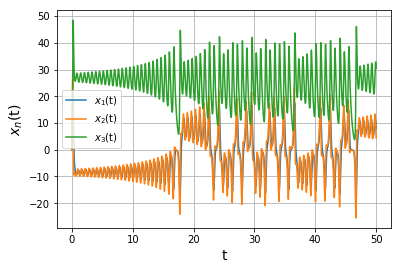

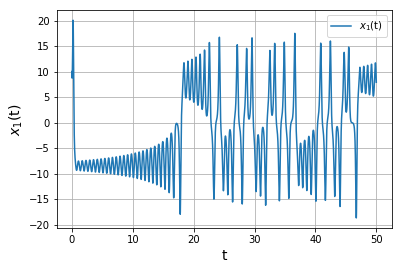

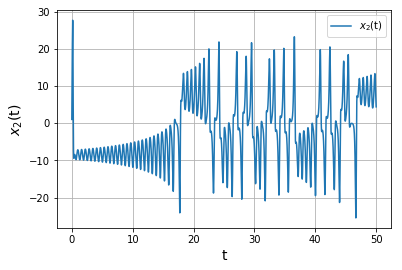

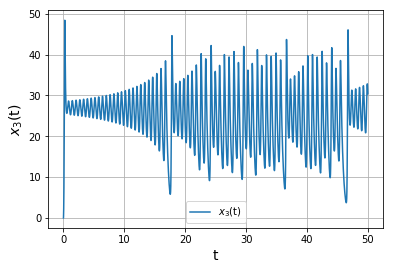

In [19]:
for i in range(len(x_0)-1):
    plt.plot(x[:,0],x[:,i+1],label='$x_{}$(t)'.format(i+1))
plt.xlabel('t',fontsize = 14)
plt.ylabel('$x_n$(t)',fontsize = 14)
plt.grid()
plt.legend()
plt.savefig(alias+'/x_n')
plt.show()
    
for i in range(len(x_0)-1):
    plt.plot(x[:,0],x[:,i+1],label='$x_{}$(t)'.format(i+1))
    plt.xlabel('t',fontsize = 14)
    plt.ylabel('$x_{}$(t)'.format(i+1),fontsize = 14)
    plt.grid()
    plt.legend()
    plt.savefig(alias+'/x_{}(t)'.format(i+1))
    plt.show()

### Generar y guardar graficas de planos fase $x_n$ vs $x_k$

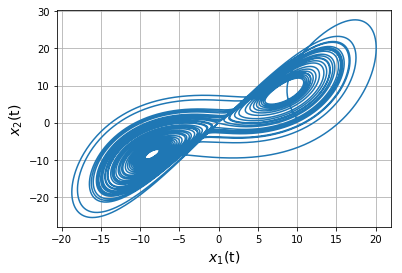

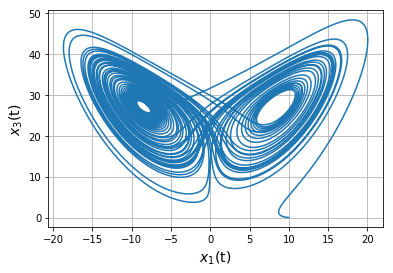

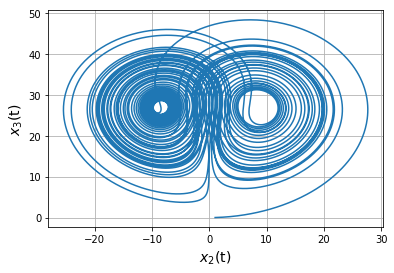

In [20]:
for i in range(len(x_0)-1):
    for j in range(i+1,len(x_0)-1):
        plt.plot(x[:,i+1],x[:,j+1])
        plt.xlabel('$x_{}$(t)'.format(i+1),fontsize = 14)
        plt.ylabel('$x_{}$(t)'.format(j+1),fontsize = 14)
        plt.grid()
        plt.savefig(alias+'/x_{}(t) vs x_{}(t)'.format(i+1,j+1))
        plt.show()